# Import the required libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset

In [46]:
linnerud = load_linnerud()
X = linnerud.data
y = linnerud.target

print("Dataset is loaded")
print(linnerud.keys())

Dataset is loaded
dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])


# Create the dataset

In [47]:
linnerud_features = pd.DataFrame(linnerud.data, columns = linnerud.feature_names )
linnerud_targets = pd.DataFrame(linnerud.target, columns = linnerud.target_names )

linnerud_full = pd.concat([linnerud_features, linnerud_targets], axis = 1)

print(linnerud_full)

    Chins  Situps  Jumps  Weight  Waist  Pulse
0     5.0   162.0   60.0   191.0   36.0   50.0
1     2.0   110.0   60.0   189.0   37.0   52.0
2    12.0   101.0  101.0   193.0   38.0   58.0
3    12.0   105.0   37.0   162.0   35.0   62.0
4    13.0   155.0   58.0   189.0   35.0   46.0
5     4.0   101.0   42.0   182.0   36.0   56.0
6     8.0   101.0   38.0   211.0   38.0   56.0
7     6.0   125.0   40.0   167.0   34.0   60.0
8    15.0   200.0   40.0   176.0   31.0   74.0
9    17.0   251.0  250.0   154.0   33.0   56.0
10   17.0   120.0   38.0   169.0   34.0   50.0
11   13.0   210.0  115.0   166.0   33.0   52.0
12   14.0   215.0  105.0   154.0   34.0   64.0
13    1.0    50.0   50.0   247.0   46.0   50.0
14    6.0    70.0   31.0   193.0   36.0   46.0
15   12.0   210.0  120.0   202.0   37.0   62.0
16    4.0    60.0   25.0   176.0   37.0   54.0
17   11.0   230.0   80.0   157.0   32.0   52.0
18   15.0   225.0   73.0   156.0   33.0   54.0
19    2.0   110.0   43.0   138.0   33.0   68.0


# Splitting the Dataset

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("Data is splitted i.e. 80% for training and 20% for testing")

Data is splitted i.e. 80% for training and 20% for testing


# Exploratory Data Analysis

In [49]:
print(linnerud_full.describe())

           Chins      Situps      Jumps      Weight      Waist      Pulse
count  20.000000   20.000000   20.00000   20.000000  20.000000  20.000000
mean    9.450000  145.550000   70.30000  178.600000  35.400000  56.100000
std     5.286278   62.566575   51.27747   24.690505   3.201973   7.210373
min     1.000000   50.000000   25.00000  138.000000  31.000000  46.000000
25%     4.750000  101.000000   39.50000  160.750000  33.000000  51.500000
50%    11.500000  122.500000   54.00000  176.000000  35.000000  55.000000
75%    13.250000  210.000000   85.25000  191.500000  37.000000  60.500000
max    17.000000  251.000000  250.00000  247.000000  46.000000  74.000000


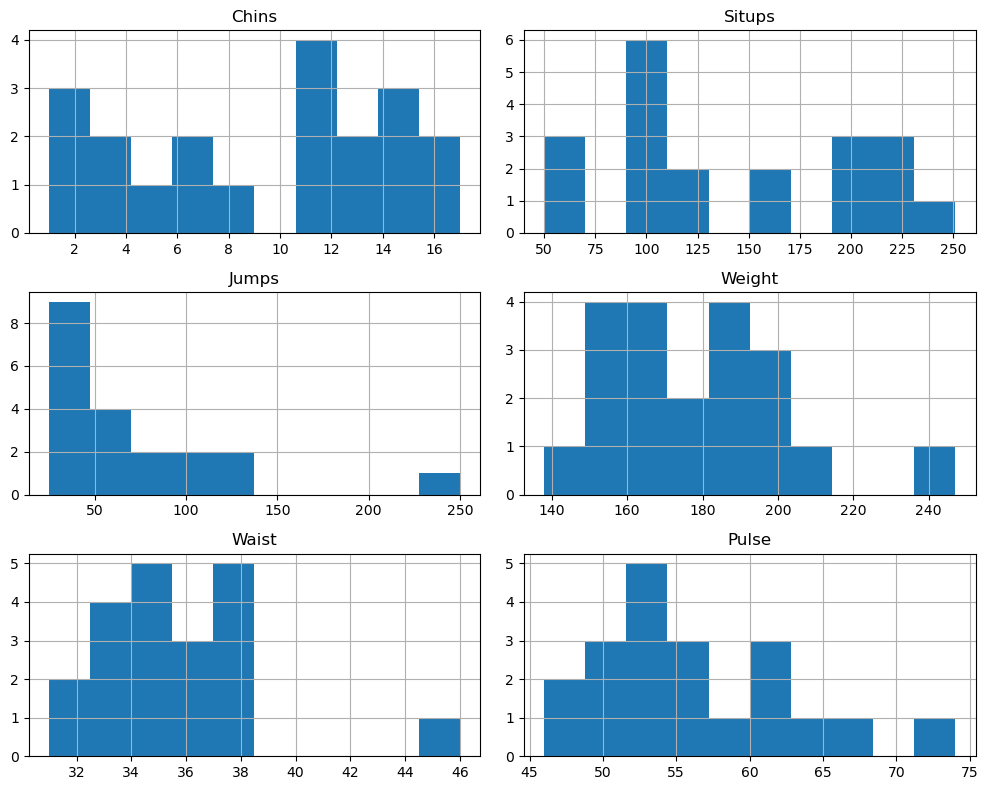

In [50]:
linnerud_full.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

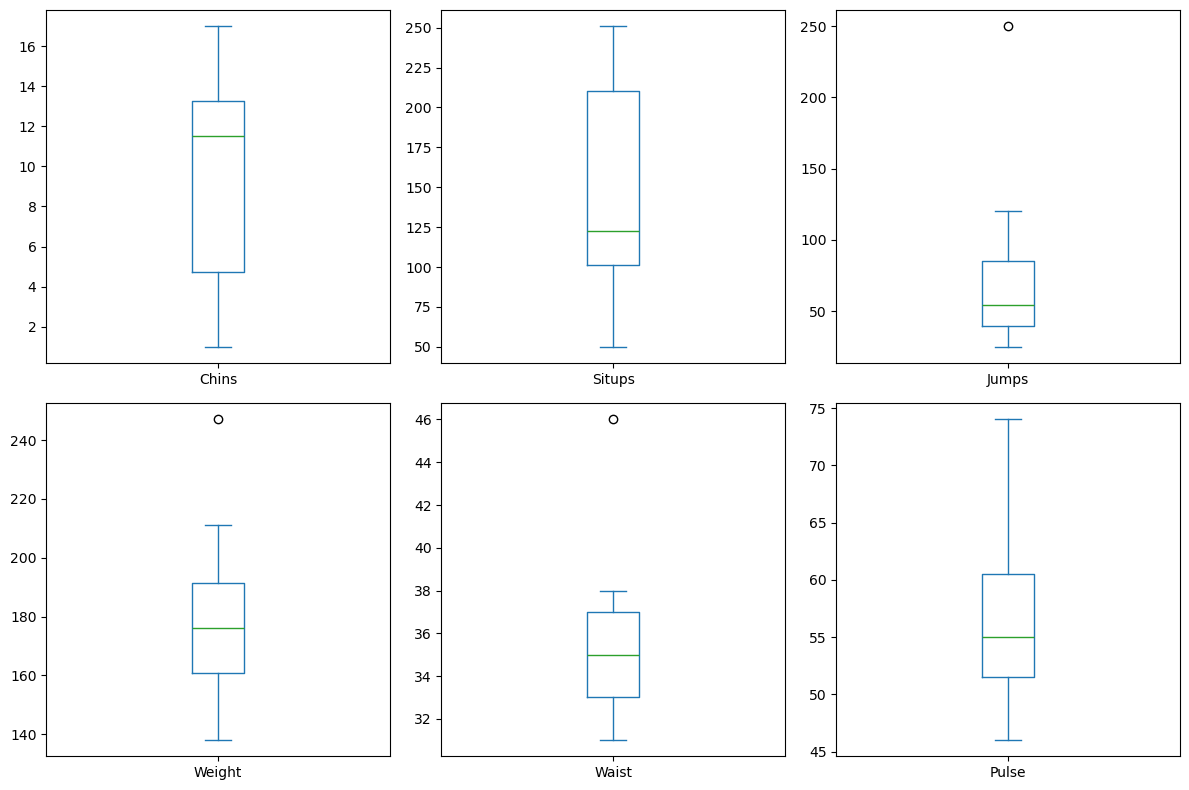

In [51]:
linnerud_full.plot(kind='box', subplots=True, layout = (2,3), figsize=(12,8))
plt.tight_layout()
plt.show()

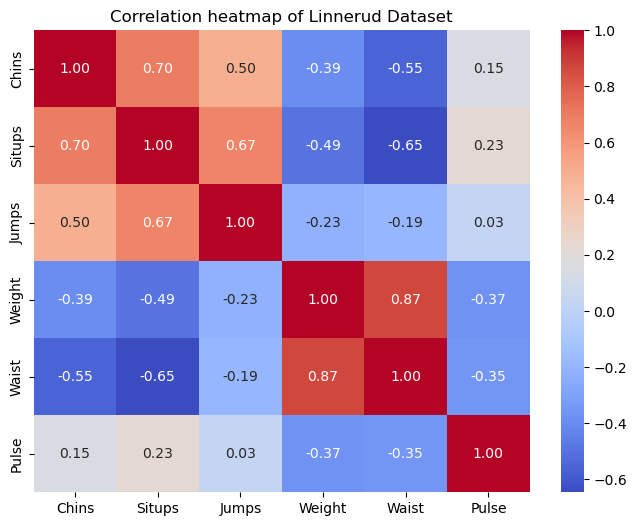

In [52]:
corr_matx = linnerud_full.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matx, annot=True, cmap ='coolwarm', fmt=".2f")
plt.title("Correlation heatmap of Linnerud Dataset")
plt.show()

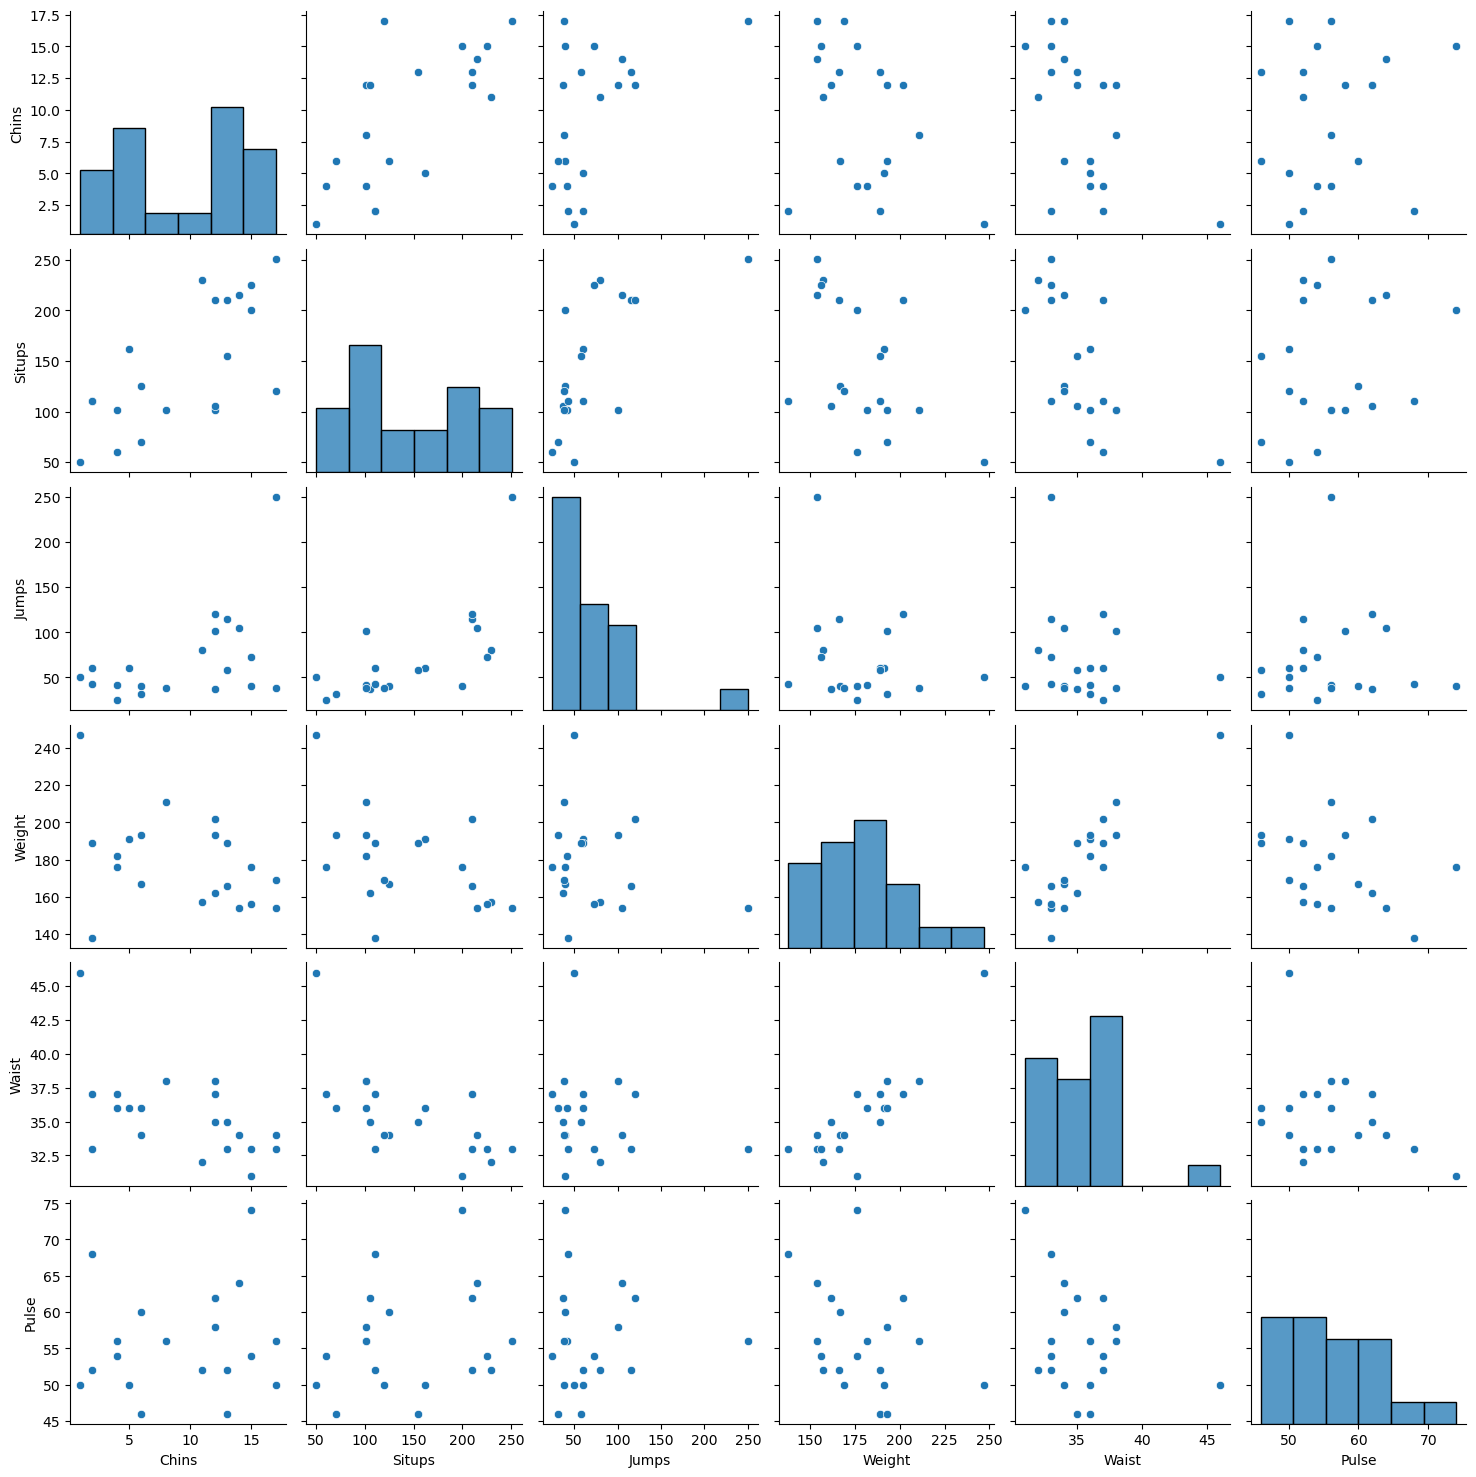

In [53]:
sns.pairplot(linnerud_full)
plt.show()

# Train the model

In [54]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("The model is being trained!")

pred = lr.predict(X_test)

The model is being trained!


# Evaluating the model

In [57]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 11.19
Mean Squared Error (MSE): 293.50
Root Mean Squared Error (RMSE): 17.13
R-squared (R²): -1.18


# Visualising the Model 

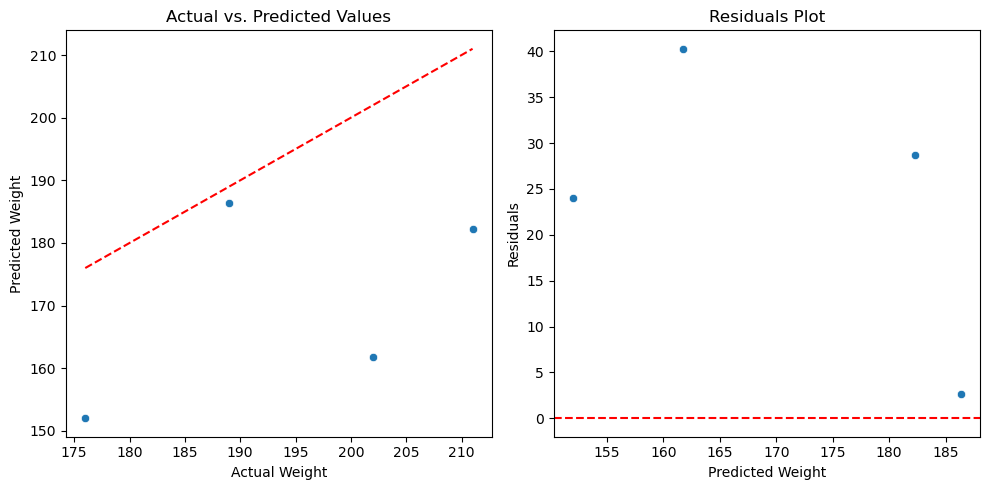

In [60]:

y_test_weight = y_test[:, 0]
y_pred_weight = pred[:, 0]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test_weight, y=y_pred_weight)
plt.plot([min(y_test_weight), max(y_test_weight)], [min(y_test_weight), max(y_test_weight)], 'r--') 
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs. Predicted Values")


plt.subplot(1, 2, 2)
residuals = y_test_weight - y_pred_weight
sns.scatterplot(x=y_pred_weight, y=residuals)
plt.axhline(0, color='r', linestyle='--') 
plt.xlabel("Predicted Weight")
plt.ylabel("Residuals")
plt.title("Residuals Plot")

plt.tight_layout()
plt.show()